# Introduction - Exploratory Analysis

In this notebook, we will conduct an analysis of the data previously prepared in the path: `data/interim/hockey_teams.json`. This file, being partially processed, is easily accessible for import and ready for more detailed analytical examination.

This part of the workshop will focus on utilizing `pandas` and `matplotlib`. The main objective is to familiarize ourselves with the dataset we are working on.  
- we will get to know the structure of the data,  
- we will conduct elementary data exploration (EDA).

## Column Description

Below is a brief description of each column in our dataset:

- **Team Name**: The name of the team participating in the match.
- **Year**: The year in which the season takes place.
- **Wins**: The number of matches won by the team in the given season.
- **Losses**: The number of matches lost by the team in the given season.
- **OT Losses**: The number of matches lost by the team in overtime in the given season.
- **Win %**: The percentage of matches won by the team in the given season.
- **Goals For (GF)**: The number of goals scored by the team in the given season.
- **Goals Against (GA)**: The number of goals conceded by the team in the given season.
- **+ / -**: The difference between the number of goals scored and conceded by the team in the given season.

# Preparation

## Import libraries
Here, load the libraries that will be needed in the following steps

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Dataset

Loading data from the `hockey_teams` file here.

In [43]:
df_raw = pd.read_json(r"..\data\interim\hockey_teams.json", orient="columns", typ="frame", encoding="utf-8")

Checking here if the data loaded correctly.

In [44]:
df_raw.head()

,Team Name,Year,Wins,Losses,Ot Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25


# Preliminary Data Transformation

## Standardizing Column Names

Currently, our dataset contains original column names which, from a technical standpoint, should not contain spaces or other special characters.

In this section, we will standardize and simplify the naming conventions to facilitate data processing in subsequent stages. We will apply the following column name mapping:

- **Team Name** -> `team`
- **Year** -> `season`
- **Wins** -> `victories`
- **Losses** -> `defeats`
- **OT Losses** -> `overtime_defeats`
- **Win %** -> `victory_percentage`
- **Goals For (GF)** -> `scored_goals`
- **Goals Against (GA)** -> `received_goals`
- **\+ / -** -> `goal_difference`

In [45]:
df_raw.columns = ["team", "season", "victories", "defeats", 
                "overtime_defeats", "victory_percentage", 
                "scored_goals", "received_goals", "goal_difference"]

## Removing Empty Values

As can be observed, the `overtime_defeats` column contains many empty values, and the expected data type is `int`. Before proceeding with further analysis, this column needs to be properly prepared.

To achieve this, we will perform the following steps:
- Check which symbol is used as an indicator of an empty field.
- Fill the empty fields with a value of 0.
- Then convert the data type of this column to `int`.

By following these steps, the `overtime_defeats` column will be ready for further analysis.

### Finding the Indicator of an Empty Field

In [46]:
is_it_empty = df_raw["overtime_defeats"].isna()
print(is_it_empty)

not_empty = df_raw["overtime_defeats"] == ""

0      False
1      False
2      False
3      False
4      False
       ...  
577    False
578    False
579    False
580    False
581    False
Name: overtime_defeats, Length: 582, dtype: bool


### Overwriting Empty Values with 0

In [47]:
df_raw.loc[df_raw["overtime_defeats"] == "", "overtime_defeats"] = 0

### Column Type Conversion

In [48]:
df_raw["overtime_defeats"] = df_raw["overtime_defeats"].astype(int)

print(df_raw.dtypes)
df = df_raw

team                   object
season                  int64
victories               int64
defeats                 int64
overtime_defeats        int32
victory_percentage    float64
scored_goals            int64
received_goals          int64
goal_difference         int64
dtype: object


# Dataset Analysis

In this section, we will focus on answering fundamental questions about our dataset in the context of hockey games. The goal is to become familiar with the dataset and develop an intuition about it.  
  
Here is a list of analysis we will perform to find answers to key questions:  
  
- How many teams have participated in league games over the years?  
- What is the total number of available seasons?  
- What is the time span of the data?  
- Are there any suspicious or outlier values in the numerical columns?  

### Number of teams that participated in league matches

Here, indicate the total number of teams available in our dataset

In [49]:
teams = df["team"].unique()

print(len(teams))

35


### Total number of seasons

Here, indicate the total number of seasons.

In [50]:
seasons = df["season"].unique()

print(len(seasons))

21


### Time Span of Data

Here, we will examine the availability of data for individual seasons. The analysis will be conducted in two stages:  
- First, we will determine the time range of the data by identifying the start year (`start_year`) and the end year (`end_year`). This will allow us to establish for which seasons we have information.  
- Next, we will look for any gaps in the time data to ensure that we have a complete set of information for each season.   

At this point, we will determine the start year and end year of the data:

In [51]:
seasons = df["season"].unique()
seasons_sorted = sorted(seasons)
print(seasons_sorted)

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011]


Here, we will check if data is present for each year within the determined range:

In [52]:
years = []
for i in range(1990,2011):
    years.append(i)


missing = set(years) - set(seasons_sorted)

print(missing)

{2004}


### Analysis of Numerical Columns

Here we will examine the basic descriptive statistics for numerical columns.

To this end, describe and analyze the results for the following columns:

- victories
- defeats
- overtime_defeats
- victory_percentage
- scored_goals
- received_goals
- goal_difference

We are interested in the following statistics:
- mean,
- count,
- standard deviation,
- percentiles = `[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]`

In [53]:
df.describe(percentiles=[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]).round(2)

,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
count,582.00,582.00,582.00,582.00,582.00,582.00,582.00,582.00
mean,2000.91,36.94,32.35,4.59,0.46,234.06,234.06,0.00
std,6.33,8.93,8.41,4.61,0.10,40.55,42.51,45.28
min,1990.00,9.00,11.00,0.00,0.12,115.00,115.00,-196.00
0%,1990.00,9.00,11.00,0.00,0.12,115.00,115.00,-196.00
5%,1991.00,21.05,20.00,0.00,0.28,175.05,168.05,-72.00
10%,1992.00,24.10,23.00,0.00,0.32,190.10,187.00,-57.00
25%,1996.00,31.00,27.00,0.00,0.39,211.00,207.00,-27.00
50%,2001.00,38.00,31.00,4.00,0.46,231.00,232.50,4.00
75%,2007.00,43.00,37.00,8.00,0.53,254.00,258.75,31.00


# `team`

In this section, we will conduct a series of analyses on individual teams participating in the leagues. This will allow us to identify the teams that have performed best in the competitions over the years.


## Analysis of Team Participation in League Seasons
Let's perform the following exercises:

- Check how many teams have participated in all seasons of the selected league.
- Display the list of these teams.

In [54]:

not_played_all = []

for team in teams:
    for season in seasons_sorted:
        if df.loc[(df["team"] == team) & (df["season"] == season)].empty:
            not_played_all.append(team)
            break

print(not_played_all)

['Hartford Whalers', 'Minnesota North Stars', 'Quebec Nordiques', 'Winnipeg Jets', 'Atlanta Thrashers', 'Carolina Hurricanes', 'Colorado Avalanche', 'Dallas Stars', 'Florida Panthers', 'Nashville Predators', 'Ottawa Senators', 'Phoenix Coyotes', 'San Jose Sharks', 'Tampa Bay Lightning', 'Mighty Ducks of Anaheim', 'Columbus Blue Jackets', 'Minnesota Wild', 'Anaheim Ducks']


We can see there is a team that changed name overtime: "Mighty Ducks of Anaheim" => "Anaheim Ducks". This fact needs to be adressed. 

In [55]:
df["team"] = df["team"].replace(
    "Mighty Ducks of Anaheim",
    "Anaheim Ducks"
)

teams = df["team"].unique()

In [56]:
not_played_all = []

for team in teams:
    for season in seasons_sorted:
        if df.loc[(df["team"] == team) & (df["season"] == season)].empty:
            not_played_all.append(team)
            break

print(not_played_all)

['Hartford Whalers', 'Minnesota North Stars', 'Quebec Nordiques', 'Winnipeg Jets', 'Atlanta Thrashers', 'Carolina Hurricanes', 'Colorado Avalanche', 'Dallas Stars', 'Florida Panthers', 'Nashville Predators', 'Ottawa Senators', 'Phoenix Coyotes', 'San Jose Sharks', 'Tampa Bay Lightning', 'Anaheim Ducks', 'Columbus Blue Jackets', 'Minnesota Wild']


List of teams that participated in all seasons of hockey competitions:

In [57]:
played_all = list(set(teams) - set(not_played_all))

print(played_all)

['Toronto Maple Leafs', 'Philadelphia Flyers', 'Edmonton Oilers', 'Chicago Blackhawks', 'New Jersey Devils', 'Pittsburgh Penguins', 'Montreal Canadiens', 'Detroit Red Wings', 'Calgary Flames', 'Boston Bruins', 'St. Louis Blues', 'Washington Capitals', 'New York Rangers', 'New York Islanders', 'Los Angeles Kings', 'Vancouver Canucks', 'Buffalo Sabres']


The number of teams that have played in all seasons:

In [58]:
print(len(played_all))

17


## Best Performing Teams in League History

Let's list the five best teams with the highest average `victory_percentage` over all years, presenting the data broken down by individual teams and seasons.

In [59]:
victory_per = pd.pivot_table(
    df,
    values="victory_percentage",
    index="team",
    aggfunc="mean"
)

victory_per_sorted = victory_per.sort_values(
    by="victory_percentage",
    ascending=False
)


victory_per_sorted.head()

,victory_percentage
team,
Detroit Red Wings,0.586000
New Jersey Devils,0.534333
Dallas Stars,0.516889
Colorado Avalanche,0.516062
Pittsburgh Penguins,0.498810


In [66]:
victory_all_seasons = pd.pivot_table(
    df,
    values="victory_percentage",
    index="team",
    columns="season",
    aggfunc="mean"
)

top5 = victory_all_seasons.loc[(victory_per_sorted["victory_percentage"] >= 0.4988
)]

top5


season,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2005,2006,2007,2008,2009,2010,2011
team,,,,,,,,,,,,,,,,,,,,,
Colorado Avalanche,NaN,NaN,NaN,NaN,NaN,0.573,0.598,0.476,0.537,0.512,...,0.549,0.512,0.488,0.524,0.537,0.537,0.390,0.524,0.366,0.500
Dallas Stars,NaN,NaN,NaN,0.500,0.354,0.317,0.585,0.598,0.622,0.524,...,0.439,0.561,0.500,0.646,0.610,0.549,0.439,0.451,0.512,0.512
Detroit Red Wings,0.425,0.537,0.560,0.548,0.688,0.756,0.463,0.537,0.524,0.585,...,0.622,0.585,0.585,0.707,0.610,0.659,0.622,0.537,0.573,0.585
New Jersey Devils,0.400,0.475,0.476,0.560,0.458,0.451,0.549,0.585,0.573,0.549,...,0.500,0.561,0.524,0.561,0.598,0.561,0.622,0.585,0.463,0.585
Pittsburgh Penguins,0.512,0.487,0.667,0.524,0.604,0.598,0.463,0.488,0.463,0.451,...,0.341,0.329,0.280,0.268,0.573,0.573,0.549,0.573,0.598,0.622


## Top Teams in History

Let's determine the top 5 teams that have won the most league titles in entire history. Let's consider whether, based on the available data, we can identify a single team that unquestionably deserves the title of the best in history.

For simplicity, let's assume that the league winner is the team with the most victories in a given season.

In [67]:
winners = []

for season in df["season"].unique():
    row = df.loc[df["season"] == season] 
    max_wins = row["victories"].max()
    winner_team = row.loc[row["victories"] == max_wins, "team"].tolist()
    
    
    for team in winner_team:
        winners.append(team)

standings = pd.Series(winners).value_counts()

print(standings)

Detroit Red Wings      6
New York Rangers       3
Colorado Avalanche     2
Pittsburgh Penguins    2
Vancouver Canucks      2
Dallas Stars           2
Chicago Blackhawks     1
St. Louis Blues        1
Ottawa Senators        1
Buffalo Sabres         1
Boston Bruins          1
San Jose Sharks        1
Washington Capitals    1
Name: count, dtype: int64


Additionally, we will determine how many teams have **never won any season**.  

In [68]:
not_winners = list(set(teams) - set(winners))

print(not_winners)

['Columbus Blue Jackets', 'Nashville Predators', 'Florida Panthers', 'Hartford Whalers', 'Anaheim Ducks', 'Los Angeles Kings', 'Minnesota North Stars', 'Quebec Nordiques', 'Phoenix Coyotes', 'Philadelphia Flyers', 'Carolina Hurricanes', 'Edmonton Oilers', 'Montreal Canadiens', 'Calgary Flames', 'New York Islanders', 'Atlanta Thrashers', 'Minnesota Wild', 'Toronto Maple Leafs', 'Winnipeg Jets', 'New Jersey Devils', 'Tampa Bay Lightning']


# `overtime_defeats`

The `overtime_defeats` variable informs us how many times a team lost in overtime throughout the year.  
  
In this section, we will perform the following exercises:  
- Identify the team that most frequently lost in overtime.  
- Rank the teams based on the number of overtime losses.  
- Calculate what percentage of teams lost at least once in overtime.  
- Determine the season with the highest number of games decided in overtime.  

## The team losing most frequently in overtime

In [69]:
ot_defeats = pd.pivot_table(
    df,
    values="overtime_defeats",
    index="team",
    aggfunc="mean"
)

ot_defeats_sorted = ot_defeats.sort_values(
    by="overtime_defeats",
    ascending=False
)


ot_defeats_sorted.head(1)

,overtime_defeats
team,
Columbus Blue Jackets,7.818182


## Percentage of teams losing in overtime (percentage of games that were lost in overtime)

In [70]:
df["% of defeats in overtime"] = ((df["overtime_defeats"]*100) / (df["defeats"] + df["overtime_defeats"])).round(2)

ot_per = pd.pivot_table(
    df,
    values="% of defeats in overtime",
    index="team",
    aggfunc="mean"
)

ot_per_sorted = ot_per.sort_values(
    by="% of defeats in overtime",
    ascending=False
)


ot_per_sorted.head()

,% of defeats in overtime
team,
Minnesota Wild,17.650909
Columbus Blue Jackets,16.387273
Nashville Predators,16.310769
Atlanta Thrashers,15.580000
Florida Panthers,15.296667


# `goals_ratio`

Based on the variables `scored_goals` and `received_goals`, we will create a new variable - `goals_ratio`, defined as the ratio of goals scored to goals conceded.

## Creating a Variable

In [71]:
df["goals_ratio"] = (df["scored_goals"] / df["received_goals"]).round(2)
df["victory_percentage"] = (df["victory_percentage"]*100).round(2)

Here we will perform a basic analysis of the variable by determining statistics such as:
- mean
- standard deviation
- quantiles 2, 3, 4

In [72]:
df["goals_ratio"].describe(percentiles=[0.25, 0.5, 0.75]).round(2)

count    582.00
mean       1.02
std        0.19
min        0.51
25%        0.88
50%        1.02
75%        1.14
max        1.80
Name: goals_ratio, dtype: float64

## Distribution of the variable `goals_ratio`

Let's generate the distribution of the variable `goals_ratio` performing the task in two variants:
- with the number of bins determined using Rice's Rule,
- with the number of bins determined using the Square Root Rule.

Methods and formulas for determining the number of bins in a histogram can be found at this link: [Determining the number of bins in a histogram](https://www.statology.org/sturges-rule/).

### Histogram of the variable using Rice's rule

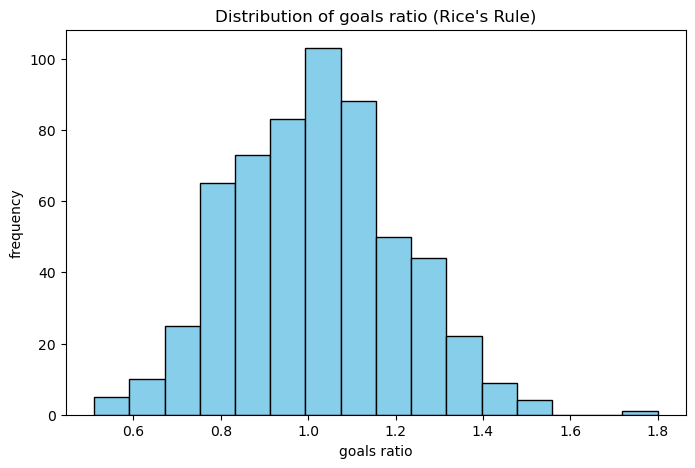

In [73]:
import matplotlib.pyplot as plt
import numpy as np
n = len(df["goals_ratio"])

bins_rice = int(2 * n**(1/3))

plt.figure(figsize=(8,5))
plt.hist(df["goals_ratio"], bins=bins_rice, color='skyblue', edgecolor='black')
plt.title("Distribution of goals ratio (Rice's Rule)")
plt.xlabel("goals ratio")
plt.ylabel("frequency")
plt.show()


### Histogram of the variable using the square root rule

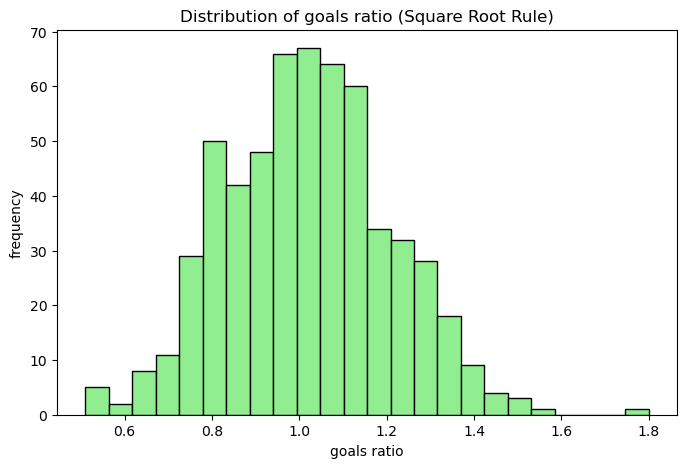

In [74]:
bins_sqrt = int(np.sqrt(n))

plt.figure(figsize=(8,5))
plt.hist(df["goals_ratio"], bins=bins_sqrt, color='lightgreen', edgecolor='black')
plt.title("Distribution of goals ratio (Square Root Rule)")
plt.xlabel("goals ratio")
plt.ylabel("frequency")
plt.show()


### Histogram of the variable using the 10 bins

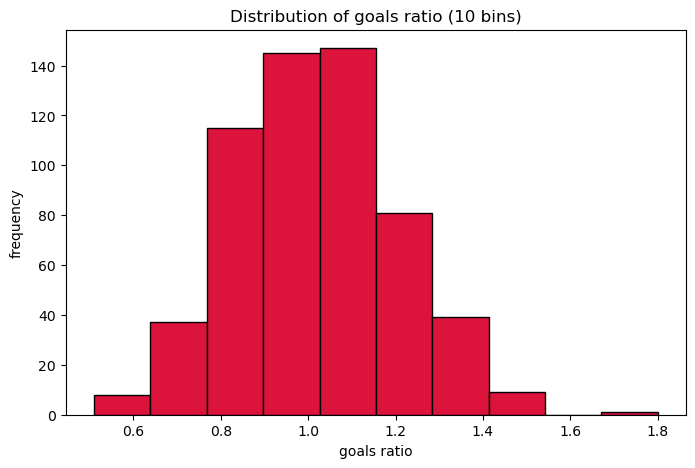

In [75]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.hist(df["goals_ratio"], bins=10, color='crimson', edgecolor='black')
plt.title("Distribution of goals ratio (10 bins)")
plt.xlabel("goals ratio")
plt.ylabel("frequency")
plt.show()


# `victory_percentage`

Similar to the analysis of the variable `goals_ratio`, we will conduct an exploratory analysis of `victory_percentage` by following these steps:  
- Determine the basic descriptive statistics, such as the mean, median, standard deviation, minimum, and maximum.  
- Examine the distribution of the variable by using a histogram to better understand its characteristics.  
- Check if there are any obvious subgroups of teams within the variable under analysis that could be identified based on specific criteria, such as the range of the variable's values.

### Descriptive Statistics

In [76]:
df["victory_percentage"].describe(percentiles=[0.25, 0.5, 0.75]).round(2)

count    582.00
mean      45.85
std       10.22
min       11.90
25%       39.00
50%       46.30
75%       53.40
max       75.60
Name: victory_percentage, dtype: float64

### Distribution

Here we will create the distribution of the variable.

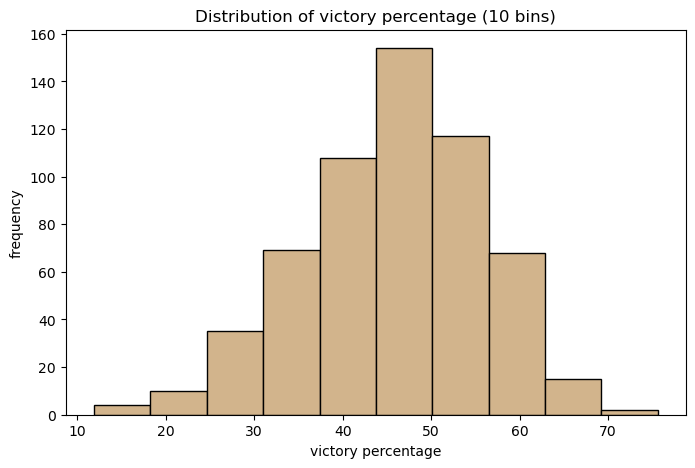

In [77]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.hist(df["victory_percentage"], bins=10, color='tan', edgecolor='black')
plt.title("Distribution of victory percentage (10 bins)")
plt.xlabel("victory percentage")
plt.ylabel("frequency")
plt.show()

# `goals_ratio` vs `victory_percentage`

We have already analyzed `goals_ratio` and `victory_percentage` as two separate variables. Now, we will analyze them together to identify potential interdependencies between them. 

## Scatterplot of Variables

Now let's create a scatterplot for the two analyzed variables, `goals_ratio` and `victory_percentage`. After completing this step, we will be able to answer the following questions:  
- What is the relationship between the variables `goals_ratio` and `victory_percentage`?  
- Can any outliers be identified in the plot?

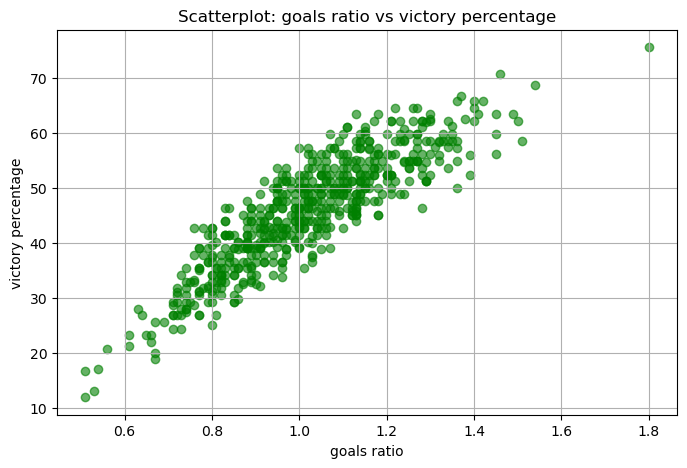

In [78]:
plt.figure(figsize=(8,5))
plt.scatter(df["goals_ratio"], df["victory_percentage"], color="green", alpha=0.6)
plt.title("Scatterplot: goals ratio vs victory percentage")
plt.xlabel("goals ratio")
plt.ylabel("victory percentage")
plt.grid(True)
plt.show()

We have identified outlying observation at an earlier stage of analysis, let's now examine this specific case as it answers the question about the most succesful team in our dataset. 

In [79]:
df["victory_percentage"].max()

75.6

In [80]:
outlier = df.loc[df["victory_percentage"] == 75.6]

outlier

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference,% of defeats in overtime,goals_ratio
483,Detroit Red Wings,1995,62,13,0,75.6,325,181,144,0.0,1.8


# Summary

In this notebook, we conducted a basic exploratory analysis of our dataset. The data was cleaned and then enriched with new variables, which we subjected to further analysis. The final step of this part is to save the processed data to a CSV file.

In [82]:
df.to_csv(r"..\data\processed\hockey_teams.csv", index=False, sep=";", encoding="utf-8")